In [1]:
import pandas as pd
import numpy as nm
from matplotlib import pyplot as plt

In [2]:
%%html

<div class="text-center">
<h1> Evaluation of Stack Overflow Survey</h1>
</div>

<h2>Data: </h2>
        <p> Review of over 65,000 respondents to a survey <br>
        </p>
        
        <h3>From Stack Overflow:<br></h3>
        "This year, we focused on seeking diverse representation while asking for information ranging<br> 
        from technologies and behavior to questions that will help us improve the Stack Overflow community <br>
        for everybody who codes."
        </p>
        
<h2> Aggregation and review of data below by the following metrics:<br></h2>
    <p>
        &#9642; Reported salary in US dollars<br> 
        &#9642; Respondents by Country <br>
        &#9642; Programming languages currently known <br>
        &#9642; Programming languages desired to learn<br><br>
        
        <p> </br>
    
    
    survey source: https://insights.stackoverflow.com/survey/2020
    </p>


In [3]:
df = pd.read_csv('2020Data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('2020Data/survey_results_schema.csv', index_col='Column')

In [4]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 85)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df.rename(columns={'ConvertedComp': 'SalaryUSD'}, inplace=True)

In [6]:
#drop inaccurate result
df.drop(14419, inplace=True)

In [7]:
#Filter Data
filt = df['SalaryUSD'] < 2000000
df = df.loc[filt]

filt = (df['Age'] > 14)
df = df.loc[filt]

filt = (df['Age'] < 70)
df = df.loc[filt]

In [8]:
df['Age'] = df.loc[:, ('Age')].astype(int)

In [9]:
df['Age'].isnull().value_counts()

False    30332
Name: Age, dtype: int64

In [10]:
country_grp = df.groupby(['Country'])

In [11]:
#Median Salary USD for all ages
dfMedianAll = (df[['Age', 'SalaryUSD']].groupby('Age').median())
dfMedianAll.head()

,SalaryUSD
Age,
15,4272.000
16,12216.000
17,12755.500
18,13080.000
19,15000.000


In [12]:
#Create country group for USA
age_sal_All = country_grp.get_group('United States')[['Age', 'SalaryUSD']].groupby('Age').median()

In [13]:
age_sal_All.rename(columns={'SalaryUSD': 'US_Salary'}, inplace=True)

In [14]:
#Add remainign top five country groups and the median for all countries
age_sal_All['UK_Salary'] = country_grp.get_group('United Kingdom')[['Age', 'SalaryUSD']].groupby('Age').median()
age_sal_All['Germ_Salary'] = country_grp.get_group('Germany')[['Age', 'SalaryUSD']].groupby('Age').median()
age_sal_All['Canada_Salary'] = country_grp.get_group('Canada')[['Age', 'SalaryUSD']].groupby('Age').median()
age_sal_All['All_Salary'] = dfMedianAll.sort_values(by='Age')

In [15]:
age_sal_Ind = country_grp.get_group('India')[['Age', 'SalaryUSD']].groupby('Age').median()
age_sal_Ind['All_Salary'] = dfMedianAll.sort_values(by='Age')
age_sal_Ind.drop(index=47, inplace=True)

In [16]:
filtdrop = age_sal_All.isnull()

In [17]:
age_sal_All.dropna(inplace=True)

In [18]:
age_sal_All.reset_index(inplace=True)

In [19]:
#Calculate the median for index range near outliers (exluding outliers)
median_Can = age_sal_All['Canada_Salary'][{40,41,42,44,45,46}].median()

In [20]:
#set outliers equal to median
age_sal_All.loc[43, ['Canada_Salary']] = median_Can
age_sal_All.loc[47, ['Canada_Salary']] = median_Can

In [21]:
# age_sal_All.reset_index(inplace=True)
age_sal_Ind.reset_index(inplace=True)

In [22]:
#Create blank lists for each salary by Country
salary_USA_y = []
salary_UK_y = []
salary_Germ_y = []
salary_Can_y = []
sal_All_y = []

#India needs its own age range because of inconsistent data aboge ave 50
salary_Ind_y = []
sal_All_Ind_y = []

In [23]:
#Create blank lists for each age by Country
age_Ind_x = []
age_All_Ind_x = []

age_All_x = []

In [24]:
#Fill lists with data
for num in age_sal_All['All_Salary']:
    sal_All_y.append(num)

for num in age_sal_All['US_Salary']:
    salary_USA_y.append(num)
    
for num in age_sal_All['Germ_Salary']:
    salary_Germ_y.append(num)
    
for num in age_sal_All['UK_Salary']:
    salary_UK_y.append(num)
    
for num in age_sal_All['Canada_Salary']:
    salary_Can_y.append(num)

for num in age_sal_Ind['SalaryUSD']:
    salary_Ind_y.append(num)
    
for num in age_sal_Ind['All_Salary']:
    sal_All_Ind_y.append(num)
    
for age in age_sal_All['Age']:
    age_All_x.append(age)

for age in age_sal_Ind['Age']:
    age_All_Ind_x.append(age)

In [25]:
median_age = df['Age'].median()

In [26]:
filt_age = df['Age'].astype(int)

In [2]:
%%html

<h2> General Salary and Age Information Listed Below</h1>

<p> 
&#9642; After sorting total respondands are 30,332<br>
&#9642; Mean Salary is \$89,441 median salary of \$54,049
<br>
&#9642; Mean Age is 32, median age is 30


In [28]:
df[['Country','SalaryUSD','Age']].median()

SalaryUSD   54049.000
Age            30.000
dtype: float64

In [29]:
df[['Country','SalaryUSD','Age']].describe()

,SalaryUSD,Age
count,30332.000,30332.000
mean,89441.404,32.100
std,156068.844,8.319
min,0.000,15.000
25%,25915.750,26.000
50%,54049.000,30.000
75%,93533.000,36.000
max,1980000.000,69.000


In [3]:
%%html

<h2> Per the graphs and data frame below: </h1>

<p> 
&#9642; The survey in general is skewed towards younger respondents. This is to be expected since the survey is conducted 
from Stack Overflow and the average age of a software developer is 32 years old. 
(The average working age across all professions is 42.3)<br><br>

&#9642; Subsequent graphs note the median salary (USD) for the top five countries responding to the survey.<br>
US Salary is notably above the world median. India is below except for one outlier. <br><br>

&#9642;  In general, all prooves follows the expected trend that the greater the age, and likely experience, the higher 
the salary. This trend does drop off after nearing 60 years old. </p>

In [31]:
us_Median = country_grp.get_group('United States')[['Age', 'SalaryUSD']].median()
uk_Median = country_grp.get_group('United Kingdom')[['Age', 'SalaryUSD']].median()
germ_Median = country_grp.get_group('Germany')[['Age', 'SalaryUSD']].median()
can_Median = country_grp.get_group('Canada')[['Age', 'SalaryUSD']].median()
ind_Median = country_grp.get_group('India')[['Age', 'SalaryUSD']].median()
all_Median = df[['Age', 'SalaryUSD']].median()

All_Med_Age = []
All_Med_Sal = []
Country = ['All', 'United States', 'United Kingdom', 'Canada', 'Germany','India' ]

All_Med_Age.append(all_Median[0])
All_Med_Age.append(us_Median[0])
All_Med_Age.append(uk_Median[0])
All_Med_Age.append(can_Median[0])
All_Med_Age.append(germ_Median[0])
All_Med_Age.append(ind_Median[0])

All_Med_Sal.append(all_Median[1])
All_Med_Sal.append(us_Median[1])
All_Med_Sal.append(uk_Median[1])
All_Med_Sal.append(can_Median[1])
All_Med_Sal.append(germ_Median[1])
All_Med_Sal.append(ind_Median[1])


In [32]:
median_df = pd.DataFrame(All_Med_Sal, Country, columns=['Median Salary USD'])
# median_df.reset_index(inplace=True)

In [33]:
median_df['Median Age'] = All_Med_Age

In [34]:
%%html

<h1> Median Salary and Age by Country</h1>

In [35]:
median_df

,Median Salary USD,Median Age
All,54049.000,30.000
United States,111000.000,32.000
United Kingdom,67215.000,31.000
Canada,68068.000,31.000
Germany,62697.000,31.000
India,10471.000,26.000


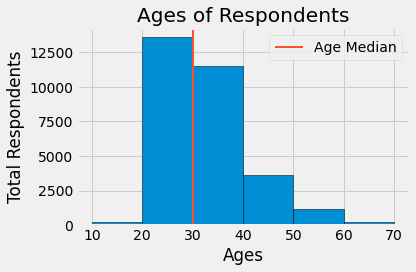

In [36]:
plt.style.use('fivethirtyeight')
bins = [10, 20, 30, 40, 50, 60, 70]

plt.hist(filt_age, bins=bins, edgecolor='black', log=False)

color = '#fc4f30'
plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')
plt.tight_layout()
plt.legend()
plt.show()

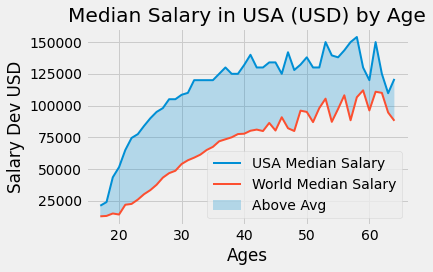

In [37]:
plt.xlabel('Ages')
plt.ylabel('Salary Dev USD')
plt.title('Median Salary in USA (USD) by Age')
plt.style.use('bmh')

plt.plot(age_All_x, salary_USA_y, label='USA Median Salary')
plt.plot(age_All_x, sal_All_y, label='World Median Salary')

plt.fill_between(age_All_x, salary_USA_y, sal_All_y,
                where=(nm.asarray(salary_USA_y) > nm.asarray(sal_All_y)),
                interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(age_All_x, salary_USA_y, sal_All_y,
                where=(nm.asarray(salary_USA_y) < nm.asarray(sal_All_y)),
                interpolate=True, color='red', alpha=0.25)


plt.tight_layout()
plt.legend()
plt.show()

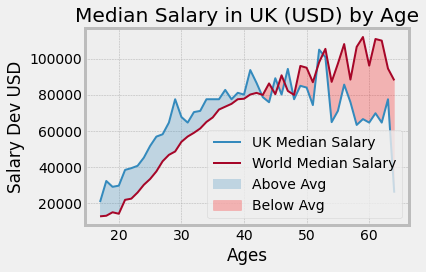

In [38]:
plt.xlabel('Ages')
plt.ylabel('Salary Dev USD')
plt.title('Median Salary in UK (USD) by Age')
plt.style.use('bmh')

plt.plot(age_All_x, salary_UK_y, label='UK Median Salary')
plt.plot(age_All_x, sal_All_y, label='World Median Salary')

plt.fill_between(age_All_x, salary_UK_y, sal_All_y,
                where=(nm.asarray(salary_UK_y) > nm.asarray(sal_All_y)),
                interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(age_All_x, salary_UK_y, sal_All_y,
                where=(nm.asarray(salary_UK_y) < nm.asarray(sal_All_y)),
                interpolate=True, color='red', alpha=0.25, label='Below Avg')


plt.tight_layout()
plt.legend()
plt.show()

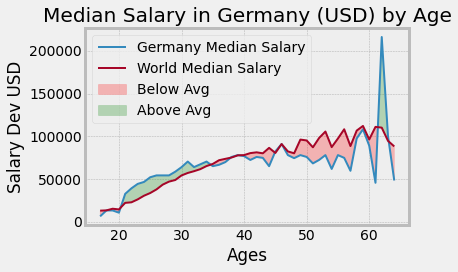

In [39]:
plt.xlabel('Ages')
plt.ylabel('Salary Dev USD')
plt.title('Median Salary in Germany (USD) by Age')
plt.style.use('bmh')

plt.plot(age_All_x, salary_Germ_y, label='Germany Median Salary')
plt.plot(age_All_x, sal_All_y, label='World Median Salary')

plt.fill_between(age_All_x, salary_Germ_y, sal_All_y,
                where=(nm.asarray(salary_Germ_y) < nm.asarray(sal_All_y)),
                interpolate=True, alpha=0.25, color='red', label='Below Avg')

plt.fill_between(age_All_x, salary_Germ_y, sal_All_y,
                where=(nm.asarray(salary_Germ_y) >= nm.asarray(sal_All_y)),
                interpolate=True, color='green', alpha=0.25, label='Above Avg')



plt.tight_layout()
plt.legend()
plt.show()

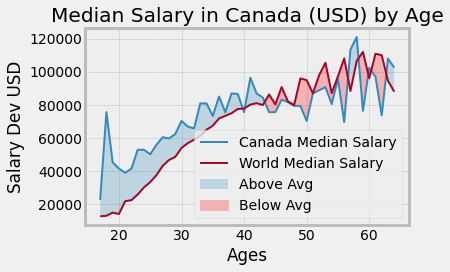

In [40]:
plt.xlabel('Ages')
plt.ylabel('Salary Dev USD')
plt.title('Median Salary in Canada (USD) by Age')
plt.style.use('bmh')

plt.plot(age_All_x, salary_Can_y, label='Canada Median Salary')
plt.plot(age_All_x, sal_All_y, label='World Median Salary')

plt.fill_between(age_All_x, salary_Can_y, sal_All_y,
                where=(nm.asarray(salary_Can_y) > nm.asarray(sal_All_y)),
                interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(age_All_x, salary_Can_y, sal_All_y,
                where=(nm.asarray(salary_Can_y) < nm.asarray(sal_All_y)),
                interpolate=True, color='red', alpha=0.25, label='Below Avg')


plt.tight_layout()
plt.legend()
plt.show()

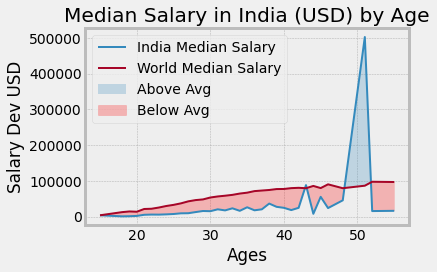

In [41]:
plt.xlabel('Ages')
plt.ylabel('Salary Dev USD')
plt.title('Median Salary in India (USD) by Age')
plt.style.use('bmh')

plt.plot(age_All_Ind_x, salary_Ind_y, label='India Median Salary')
plt.plot(age_All_Ind_x, sal_All_Ind_y, label='World Median Salary')

plt.fill_between(age_All_Ind_x, salary_Ind_y, sal_All_Ind_y,
                where=(nm.asarray(salary_Ind_y) > nm.asarray(sal_All_Ind_y)),
                interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(age_All_Ind_x, salary_Ind_y, sal_All_Ind_y,
                where=(nm.asarray(salary_Ind_y) < nm.asarray(sal_All_Ind_y)),
                interpolate=True, color='red', alpha=0.25, label='Below Avg')


plt.tight_layout()
plt.legend()
plt.show()

In [42]:
dftotal_all = df[['Age', 'LanguageWorkedWith']]
dftotal_all

,Age,LanguageWorkedWith
Respondent,,
8,36,Python;SQL
10,22,HTML/CSS;Java;JavaScript;Python;SQL
11,23,C#;JavaScript;Swift
12,49,HTML/CSS;JavaScript
13,53,C;JavaScript;Python
...,...,...
64460,25,HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript
64810,32,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
64938,33,Assembly;C;C++;HTML/CSS;Java;JavaScript;PHP;Py...


In [43]:
dftotal_all['LanguageWorkedWith'].str.contains('Python').value_counts()

False    17635
True     12541
Name: LanguageWorkedWith, dtype: int64

In [44]:
filt = (dftotal_all['LanguageWorkedWith'].str.contains('Python') == True)

In [45]:
all_know_python = dftotal_all[filt]
all_know_python

,Age,LanguageWorkedWith
Respondent,,
8,36,Python;SQL
10,22,HTML/CSS;Java;JavaScript;Python;SQL
13,53,C;JavaScript;Python
17,25,C#;HTML/CSS;JavaScript;Python;SQL;VBA
32,31,C;C++;Java;Python;SQL;VBA
...,...,...
62938,31,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...
62957,24,C#;C++;HTML/CSS;Java;Python;R
63288,31,HTML/CSS;JavaScript;Python;SQL;TypeScript


In [46]:
all_know_python = all_know_python['Age'].value_counts()

In [47]:
all_know_python = all_know_python.reset_index()

In [48]:
all_know_python.rename(columns={'Age': 'Qty'}, inplace=True)

In [49]:
all_know_python.rename(columns={'index': 'Age'}, inplace=True)
all_know_python.sort_values(by='Age', inplace=True)

In [50]:
total_age_responded = df['Age'].value_counts()

In [51]:
total_age_responded = df['Age'].value_counts()

In [52]:
total_age_responded = total_age_responded.reset_index()

In [53]:
total_age_responded.rename(columns={'Age': 'Qty'}, inplace=True)

In [54]:
total_age_responded.rename(columns={'index': 'Age'}, inplace=True)
total_age_responded.sort_values(by='Age', inplace=True)

In [55]:
all_know_python.reset_index(inplace=True)
all_know_python.drop(columns='index', inplace=True)

In [56]:
total_age_responded.reset_index(inplace=True)

In [57]:
total_age_responded['QtyPython'] = all_know_python['Qty']

In [58]:
total_age_responded['Percent_Py'] = (total_age_responded['QtyPython']/total_age_responded['Qty']) * 100

In [59]:
df[['Country', 'Age', 'LanguageWorkedWith', 'LanguageDesireNextYear']].head(15)

,Country,Age,LanguageWorkedWith,LanguageDesireNextYear
Respondent,,,,
8,United States,36,Python;SQL,JavaScript
10,United Kingdom,22,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL
11,United Kingdom,23,C#;JavaScript;Swift,Go;JavaScript;Swift;TypeScript
12,Spain,49,HTML/CSS;JavaScript,HTML/CSS;JavaScript
13,Netherlands,53,C;JavaScript;Python,Python
14,United States,27,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
16,United Kingdom,45,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Go
17,United States,25,C#;HTML/CSS;JavaScript;Python;SQL;VBA,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...
18,United States,32,Bash/Shell/PowerShell;HTML/CSS;Perl,HTML/CSS;Perl


In [60]:
age_sal_All.set_index('Age', inplace=True)

In [61]:
total_age_responded.set_index('Age', inplace=True)

In [62]:
total_age_responded['SalaryAllUSD'] = age_sal_All['All_Salary']

In [63]:
total_age_responded.dropna(inplace=True)

In [64]:
total_age_responded.reset_index(inplace=True)

In [65]:
#create list of all ages related to Python:
Python_age_resp = []
for age in total_age_responded['Age']:
    Python_age_resp.append(age)

In [66]:
#Create list of percent of respondents that know python
Python_percent = []
for qtyPy in total_age_responded['Percent_Py']:
        Python_percent.append(qtyPy)

In [4]:
%%html

<h2> 
The graph below notes median salary (USD) for all countries and ages</h1>

<p>
&#9642;The color notes if respondents currently know Python.<br>
(The more yellow the color, the higher percentage of respondents already know Python)</p><br><br>


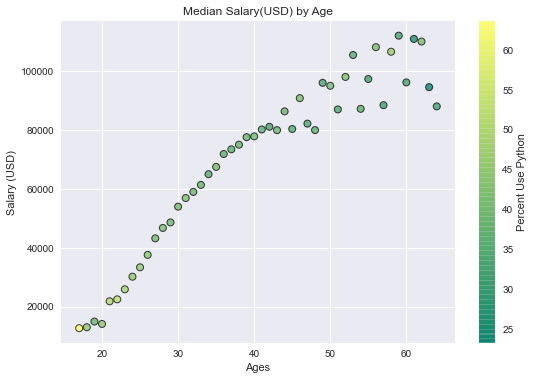

In [68]:
plt.style.use('seaborn')

plt.scatter(age_All_x, sal_All_y, c = Python_percent, cmap='summer',
               edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label("Percent Use Python")

plt.title('Median Salary(USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Salary (USD)')

plt.tight_layout()
plt.savefig('Sal_Age_Py.png')

In [69]:
df['LanguageWorkedWith'].str.contains('Python').value_counts()

False    17635
True     12541
Name: LanguageWorkedWith, dtype: int64

In [70]:
df['LanguageDesireNextYear'].describe()

count      28838
unique      9797
top       Python
freq         461
Name: LanguageDesireNextYear, dtype: object

In [71]:
filt = (df['LanguageDesireNextYear'].str.contains('Script') == True)
LearnJavaScript = df.loc[filt][['LanguageDesireNextYear']].count()
LearnJavaScript = LearnJavaScript[0]

filt = (df['LanguageDesireNextYear'].str.contains('HTML') == True)
learnHTML = df.loc[filt][['LanguageDesireNextYear']].count()
learnHTML = learnHTML[0]

filt = (df['LanguageDesireNextYear'].str.contains('SQL') == True)
learnSQL = df.loc[filt][['LanguageDesireNextYear']].count()
learnSQL = learnSQL[0]

filt = (df['LanguageDesireNextYear'].str.contains('Python') == True)
learnPy = df.loc[filt][['LanguageDesireNextYear']].count()
learnPy = learnPy[0]

filt = (df['LanguageDesireNextYear'].str.contains("C\+\+") == True)
learnCpp = df.loc[filt][['LanguageDesireNextYear']].count()
learnCpp = learnCpp[0]

filt = (df['LanguageDesireNextYear'].str.contains("Java[^Script]") == True)
learnJava = df.loc[filt][['LanguageDesireNextYear']].count()
learnJava = learnJava[0]

In [72]:
df['LanguageWorkedWith'].describe()

count                           30176
unique                           8618
top       HTML/CSS;JavaScript;PHP;SQL
freq                              567
Name: LanguageWorkedWith, dtype: object

In [73]:
filt = (df['LanguageWorkedWith'].str.contains('Script') == True)
totalJavaScript = df.loc[filt][['LanguageWorkedWith']].count()
totalJavaScript = totalJavaScript[0]

filt = (df['LanguageWorkedWith'].str.contains('HTML') == True)
totalHTML = df.loc[filt][['LanguageWorkedWith']].count()
totalHTML = totalHTML[0]

filt = (df['LanguageWorkedWith'].str.contains('SQL') == True)
totalSQL = df.loc[filt][['LanguageWorkedWith']].count()
totalSQL = totalSQL[0]

filt = (df['LanguageWorkedWith'].str.contains('Python') == True)
totalPy = df.loc[filt][['LanguageWorkedWith']].count()
totalPy = totalPy[0]

filt = (df['LanguageWorkedWith'].str.contains("C\+\+") == True)
totalCpp = df.loc[filt][['LanguageWorkedWith']].count()
totalCpp = totalCpp[0]

filt = (df['LanguageWorkedWith'].str.contains("Java[^Script]") == True)
totalJava = df.loc[filt][['LanguageWorkedWith']].count()
totalJava = totalJava[0]

In [5]:
%%html

<h2> 
The pie charts below note the popularity of the top 5 programming languages</h1>

<p>
&#9642; The first chart shows languages currently known by respondents. <br>
&#9642; The second chart shows languages currently respondents want to lear in 2021. <br><br>

&#9642; These charts highlight the desire for more programmers to learn and use Python. <br>
(Currently 14.4% of respondents know Python, but 21.3% of respondents want to learn Python in 2021)<br><br>

&#9642; The standard languages of JavaScript, HTML, and SQL remain popular. Judging from this information,
Python looks to be the upcoming language most respondents want to learn in 2021. </p>




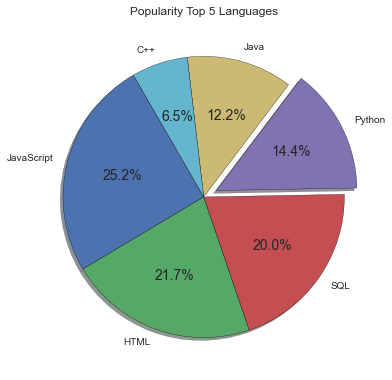

In [75]:
labels = ['JavaScript', 'HTML', 'SQL', 'Python', 'Java', 'C++']
slices = [totalJavaScript, totalHTML, totalSQL, totalPy, totalJava, totalCpp]
explode = [0, 0, 0, 0.1, 0, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=120, autopct='%1.1f%%',
       wedgeprops={'edgecolor': 'black'})

plt.title('Popularity Top 5 Languages')
plt.tight_layout()

plt.savefig('PieChartPopLang.png')
plt.show()

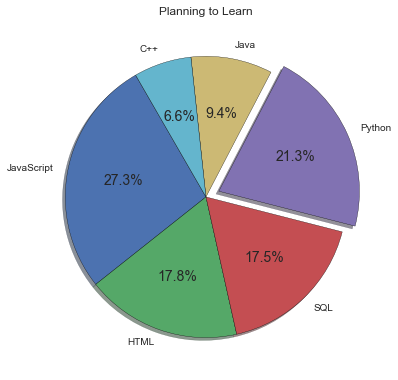

In [76]:
labels = ['JavaScript', 'HTML', 'SQL', 'Python', 'Java', 'C++']
slices = [LearnJavaScript, learnHTML, learnSQL, learnPy, learnJava, learnCpp]
explode = [0, 0, 0, 0.1, 0, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=120, autopct='%1.1f%%',
       wedgeprops={'edgecolor': 'black'})

plt.title('Planning to Learn')
plt.tight_layout()
plt.savefig('PieChartLearnLang.png')
plt.show()

In [7]:
%%html

<h2> 
Conclusions Drawn: </h1>
    
<p>
&#9642; The United States has a noticeably higher mean and median salary. The UK, Canada and Germany 
all have similar mean and median salaries. India claimed the fifth highest median salary, though the median 
salary drops off considerably. (India's median salary is 9% of the US median salary and just under 20% of the 
world median salary<br><br>
                                
&#9642; The median age of the respondent is 30 years old. This aligns with expectations<br><br>
                                
&#9642; A higher percentage of younger respondents 20-35 years old tend to already know Python. Over the age of 35, the
percentage of respondents that already know Python drop off<br><br>
                                
&#9642; Based on responses to this survey, Python is a popular upcoming programing language. This is not surprising 
given the ease and versatility of the Python programming language. The increase in desire to learn this language in 2021, 
compared to the relatively low percentage of respondents that currently know Python help support this conclusion.<br><br><br>

End Report 3/18/21 completed by Ryan Olsen <p>

